# Интересное про python

## Скорость Numpy

NDArray работает в разы быстрее благодаря способу хранения информации

In [ ]:
a = [1, 2, 3, 300]

for i in range(len(a)-1):

    print(i, id(a[i]))
    print(i+1, id(a[i+1]))
    print('delta', id(a[i+1]) - id(a[i]))
    print('--')

0 10750856
1 10750888
delta 32
--
1 10750888
2 10750920
delta 32
--
2 10750920
3 138709022805712
delta 138709012054792
--


Python использует хитрые оптимизации и кэширует целые числа от -5 до 256 в **непрерывной** области памяти

In [ ]:
id(256) - id(0), id(257) - id(0)

(8192, 138709012058248)

При повторном вызове строчки выше, мы получим другое значение во втором элементе ответа, так как python заново создаст объект 257 где-то в куче и расстояние между ним и объектом 0 уже буде другое

In [ ]:
id(256) - id(0), id(257) - id(0)

(8192, 138709012058312)

## display()

In [ ]:
a = [1, 2, 3]
b = a
del a
print(b)
print(a)

[1, 2, 3]


NameError: name 'a' is not defined

In [ ]:
a = [1, 2, 3]
b = a
b[0] = 10
print(a)

[10, 2, 3]


In [ ]:
a = [1, 2, 3]
b = a[:]
b[0] = 10
print(a)

[1, 2, 3]


In [ ]:
a = [2, 4, 6]
a

[2, 4, 6]

In [ ]:
a

[2, 4, 6]

In [ ]:
# Обновляем куда указывает имя "a", по хорошему старые данные должны затереться
a = [3, 5, 7]

In [ ]:
# Так как в IPython есть специальный массив куда сказываются аутпуты ячеек,
# то старое содержимое "a" никуда не делось и всё равно весит в памяти
Out[144]

KeyError: 144

In [ ]:
df = pd.DataFrame()

NameError: name 'pd' is not defined

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
df.drop(colums=['a'], inplace=True)

In [ ]:
display([1, 2, 3])

[1, 2, 3]

# Урок 3. Классификация

In [ ]:
import numpy as np
import pandas as pd

## Смотрим на данные

In [ ]:
# Качаем данные
!gdown 1nCHCT5XWio5fSN0mYNwRbEzTGL_sIcN4

Downloading...
From: https://drive.google.com/uc?id=1nCHCT5XWio5fSN0mYNwRbEzTGL_sIcN4
To: /content/loan_data.csv
100% 3.61M/3.61M [00:00<00:00, 31.1MB/s]


Датасет заявок на кредит с информацией о клиента и флагом одобрение или отказ по заявке

In [ ]:
#Считываем скачанный csv файл
df = pd.read_csv('loan_data.csv')

In [ ]:
# Посмотрим на него
display(df)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Заведём константу, чтобы каждый раз не вспоминать как называется колонка с таргетом
TARGET = 'loan_status'

In [ ]:
bb# Посмотрим на пропуски
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df['age_bin'] = df['person_age'] // 6

<Axes: xlabel='age_bin'>

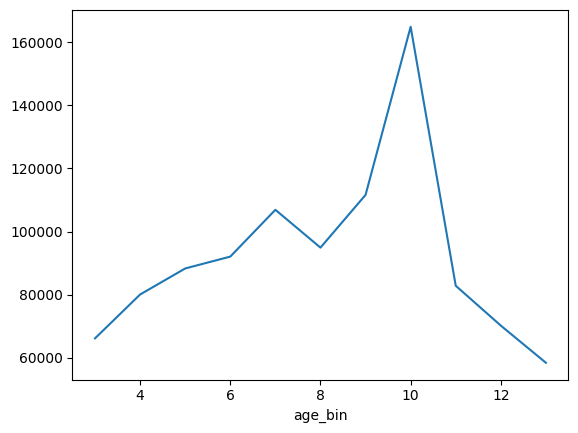

In [ ]:
df[df['person_age'] < 80].groupby('age_bin')['person_income'].mean().plot()

Пропусков нет - скучно :(

In [ ]:
from numpy import random
# зашумим часть данных для дальнейшего интереса :-)

# Зашумим случаный 1000 возрастов (может быть меньше с учетом коллизий индексов)
# Это даст нам случайное распределение пустот
df.loc[random.choice(range(df.shape[0]), 1000), 'person_age'] = np.nan

# Уберём значительную часть доходов у людей, которые хотят взять кредит на образование
# Это зашумление нам даст неслучайное смещение
df.loc[df[df['loan_intent'] == 'EDUCATION'].sample(3000).index, 'person_income'] = np.nan

In [ ]:
df.isna().sum()

,0
person_age,988
person_gender,0
person_education,0
person_income,3000
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
# Проверим гипотезы про случайность/неслучайность получившихся пустот

print('Target rate all:', df[TARGET].mean())

print('--'*20)

print('Target rate income null:', df[df['person_income'].isna()][TARGET].mean())
print('Target rate income not null:', df[df['person_income'].notna()][TARGET].mean())

print('--'*20)

print('Target rate age null:', df[df['person_age'].isna()][TARGET].mean())
print('Target rate age not null:', df[df['person_age'].notna()][TARGET].mean())

Target rate all: 0.2222222222222222
----------------------------------------
Target rate income null: 0.17333333333333334
Target rate income not null: 0.2257142857142857
----------------------------------------
Target rate age null: 0.2257085020242915
Target rate age not null: 0.22214396073798054


## Попробуем обучить LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Разобъем на тренировочную и тестовую выборки
train, test = train_test_split(df, test_size=0.25, random_state=43)

In [ ]:
# Для простоты возьмём несколько числовых колонок в качестве факторов
features = ['loan_amnt', 'loan_int_rate']

In [ ]:
X_train = train[features]
y_train = train[TARGET]

X_test = test[features]
y_test = test[TARGET]

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
def least_squared_estimator(X, y, learn_intercept=False):
  X = np.array(X)
  if learn_intercept:
    X = np.concatenate([np.ones((X.shape[0], 1), ), X ], axis=1)
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y
  return coefs

In [ ]:
coefs = least_squared_estimator(X_train, y_train, learn_intercept=True)
f = lambda x: coefs[0] + coefs[1] * x[:, 0] + coefs[2] * x[:, 1]

In [ ]:
coefs

array([-3.15807260e-01,  4.23973811e-06,  4.52734577e-02])

In [ ]:
train['predict'] = lr.predict(X_train)
test['predict'] = lr.predict(X_test)


train['predict_proba'] = lr.predict_proba(X_train)[:, 1]
test['predict_proba'] = lr.predict_proba(X_test)[:, 1]

In [ ]:
train['predict_naive'] = f(X_train.values)
test['predict_naive'] = f(X_test.values)

In [ ]:
import matplotlib as mpl

train_sample = train.sample(2500)
test_sample = test.sample(2500)

Посмотрим как мы попали на Train

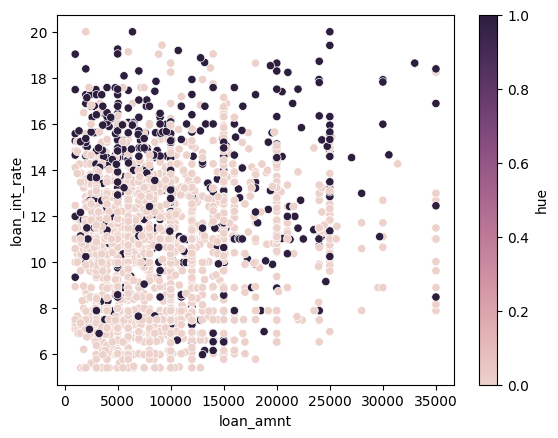

In [ ]:
cmap = sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue=TARGET, hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

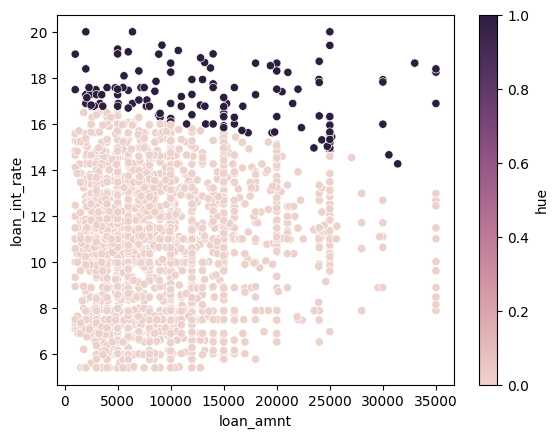

In [ ]:
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue='predict', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

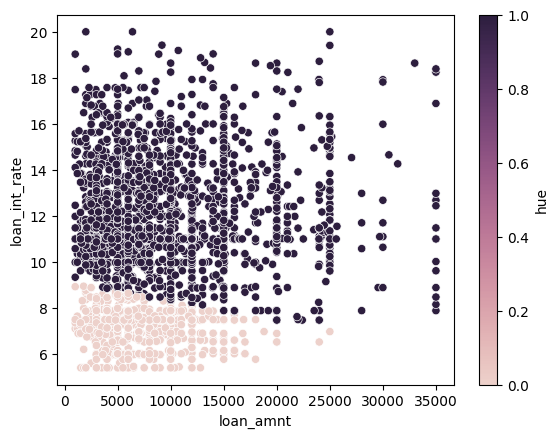

In [ ]:
train_sample['new_predict'] = (train_sample['predict_proba'] > 0.1).astype(int)
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue='new_predict', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

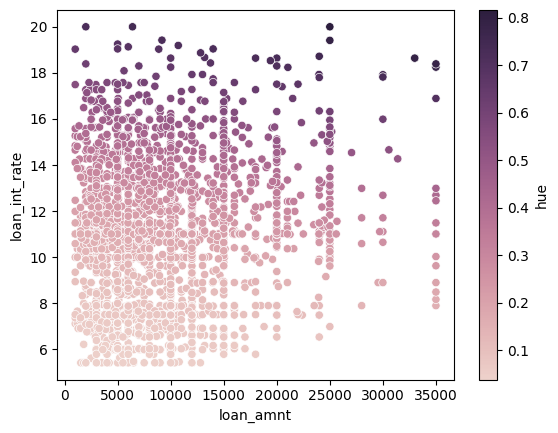

In [ ]:
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue='predict_proba', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

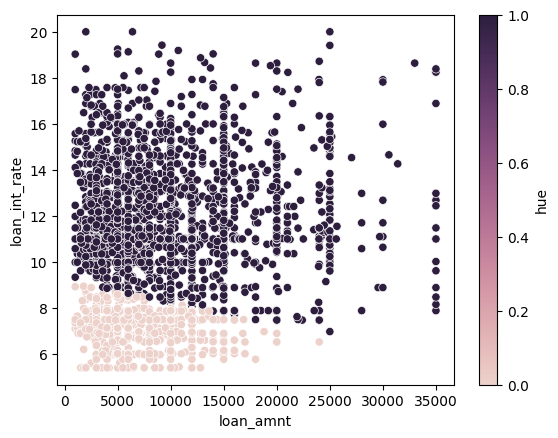

In [ ]:
train_sample['new_predict'] = (train_sample['predict_naive'] > 0.1).astype(int)
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=train_sample, x='loan_amnt', y='loan_int_rate', hue='new_predict', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

Посмотрим как мы попали на Test

In [ ]:
cmap = sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=test_sample, x='loan_amnt', y='loan_int_rate', hue=TARGET, hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

In [ ]:
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=test_sample, x='loan_amnt', y='loan_int_rate', hue='predict', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

In [ ]:
cmap= sns.color_palette('ch:', as_cmap= True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(data=test_sample, x='loan_amnt', y='loan_int_rate', hue='predict_proba', hue_norm=sm.norm, palette= cmap, legend= False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('hue')

Посчитаем Метрики

In [ ]:
# Для начала заимпортим их
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

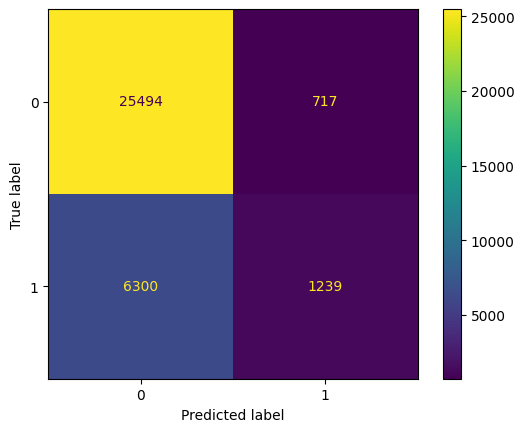

In [ ]:
# Нарисуем Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(train[TARGET], train['predict'])).plot()

In [ ]:
# train
accuracy_score(train[TARGET], train['predict'])

0.7920888888888888

In [ ]:
# train
accuracy_score(train[TARGET], [0] * train.shape[0])

0.7766222222222222

In [ ]:
# test
accuracy_score(test[TARGET], test['predict'])

0.7953777777777777

In [ ]:
accuracy_score(train[TARGET], (train['predict_proba'] > 0.44).astype(int))

0.7988740740740741

In [ ]:
# train
precision_score(train[TARGET], train['predict'])

0.6334355828220859

In [ ]:
# test
precision_score(test[TARGET], test['predict'])

0.6276083467094703

In [ ]:
# train
recall_score(train[TARGET], train['predict'])

0.16434540389972144

In [ ]:
# test
recall_score(test[TARGET], test['predict'])

0.1588785046728972

In [ ]:
# train
roc_auc_score(train[TARGET], train['predict'])

0.5684952382895654

In [ ]:
# test
roc_auc_score(test[TARGET], test['predict'])

0.5662409362595342

In [ ]:
# train
roc_auc_score(train[TARGET], train['predict_proba'])

0.7223131917050427

In [ ]:
# test
roc_auc_score(test[TARGET], test['predict_proba'])

0.7181920078610324

In [ ]:
roc_auc_score(train[TARGET], train['predict_naive'])

0.7224718164513158

In [ ]:
roc_auc_score(test[TARGET], test['predict_naive'])

0.7181826688628414

In [ ]:
from tqdm.auto import tqdm
stats = []
for threshold in tqdm(np.linspace(0.01, 1, 100)):
  stats.append({
      'threshold': threshold,
      'accuracy': accuracy_score(train[TARGET], (train['predict_proba'] > threshold).astype(int)),
      'accuracy_naive': accuracy_score(train[TARGET], (train['predict_naive'] > threshold).astype(int)),
      'precision': precision_score(train[TARGET], (train['predict_proba'] > threshold).astype(int)),
      'precision_naive': precision_score(train[TARGET], (train['predict_naive'] > threshold).astype(int)),
      'recall': recall_score(train[TARGET], (train['predict_proba'] > threshold).astype(int)),
      'recall_naive': recall_score(train[TARGET], (train['predict_naive'] > threshold).astype(int)),
  })
stats = pd.DataFrame(stats)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

<Axes: xlabel='threshold', ylabel='accuracy'>

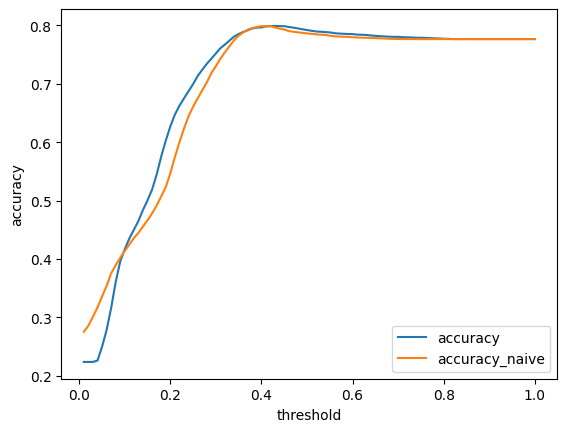

In [ ]:
sns.lineplot(data=stats, x='threshold', y='accuracy', label='accuracy')
sns.lineplot(data=stats, x='threshold', y='accuracy_naive',  label='accuracy_naive')

<Axes: xlabel='threshold', ylabel='precision'>

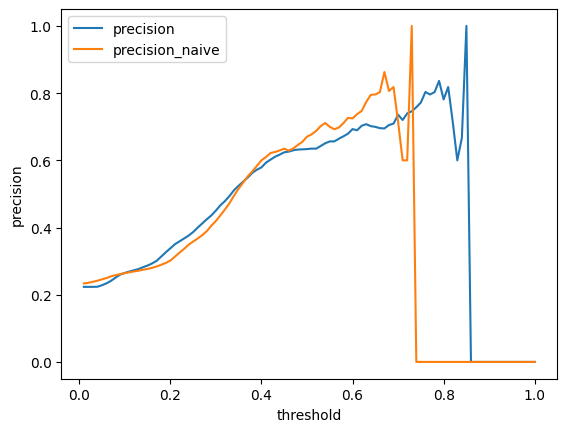

In [ ]:
sns.lineplot(data=stats, x='threshold', y='precision', label='precision')
sns.lineplot(data=stats, x='threshold', y='precision_naive',  label='precision_naive')

<Axes: xlabel='threshold', ylabel='recall'>

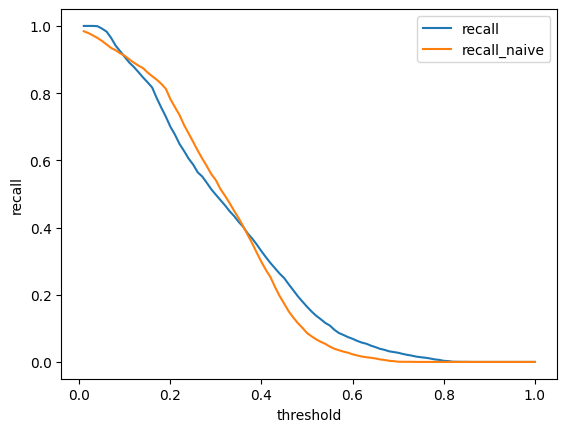

In [ ]:
sns.lineplot(data=stats, x='threshold', y='recall', label='recall')
sns.lineplot(data=stats, x='threshold', y='recall_naive',  label='recall_naive')

### Таргет рейт в бинах скоров модели (калибровка)

In [ ]:
# Посчитаем равномерные бины по скору на train
_, bins = pd.qcut(train['predict_proba'], q=20, retbins=True)

# Пременим их к train и test
train['proba_bin'] = pd.cut(train['predict_proba'], bins=bins)
test['proba_bin'] = pd.cut(test['predict_proba'], bins=bins)

In [ ]:
# Внутри бинов посчитаем средний таргет и среднюю predict_proba
train_stats = train.groupby(['proba_bin'])[['predict_proba', TARGET]].mean()
display(train_stats)

<ipython-input-213-5d9196b1e7dd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_stats = train.groupby(['proba_bin'])[['predict_proba', TARGET]].mean()


,predict_proba,loan_status
proba_bin,,
"(0.0377, 0.0567]",0.048403,0.060534
"(0.0567, 0.068]",0.062784,0.086002
"(0.068, 0.0776]",0.073074,0.090372
"(0.0776, 0.0884]",0.082339,0.089994
"(0.0884, 0.106]",0.096756,0.138361
"(0.106, 0.129]",0.117001,0.137173
"(0.129, 0.149]",0.139000,0.140828
"(0.149, 0.166]",0.158549,0.145294
"(0.166, 0.178]",0.171868,0.172146


In [ ]:
train['predict_proba_calib'] = calib.predict_proba(train[['predict_proba']])[:, 1]
test['predict_proba_calib'] = calib.predict_proba(test[['predict_proba']])[:, 1]

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(-2.5, 0, ''),
  Text(0.0, 0, '(0.0377, 0.0567]'),
  Text(2.5, 0, ''),
  Text(5.0, 0, '(0.106, 0.129]'),
  Text(7.5, 0, ''),
  Text(10.0, 0, '(0.19, 0.203]'),
  Text(12.5, 0, ''),
  Text(15.0, 0, '(0.299, 0.332]'),
  Text(17.5, 0, ''),
  Text(20.0, 0, '')])

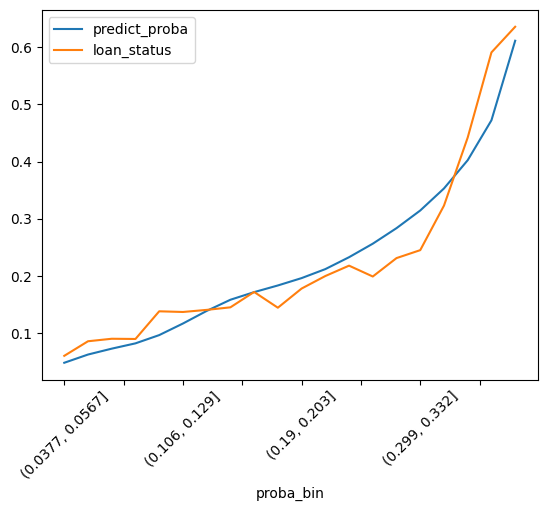

In [ ]:
train_stats.plot()
plt.xticks(rotation=45)

<ipython-input-217-700378b3aff5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valid_stats = test.groupby(['proba_bin'])[['predict_proba', TARGET]].mean()


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(-2.5, 0, ''),
  Text(0.0, 0, '(0.0377, 0.0567]'),
  Text(2.5, 0, ''),
  Text(5.0, 0, '(0.106, 0.129]'),
  Text(7.5, 0, ''),
  Text(10.0, 0, '(0.19, 0.203]'),
  Text(12.5, 0, ''),
  Text(15.0, 0, '(0.299, 0.332]'),
  Text(17.5, 0, ''),
  Text(20.0, 0, '')])

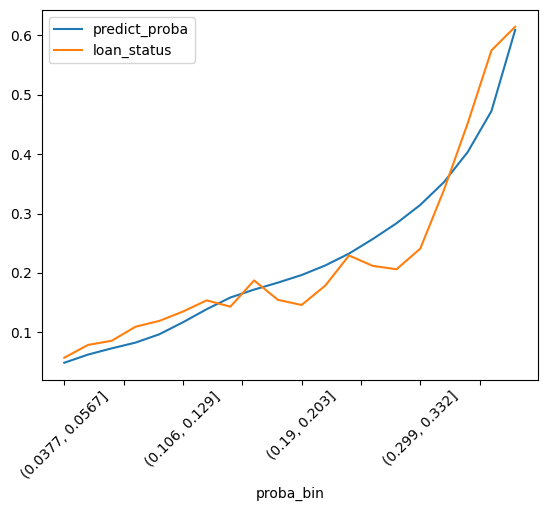

In [ ]:
valid_stats = test.groupby(['proba_bin'])[['predict_proba', TARGET]].mean()
valid_stats.plot()
plt.xticks(rotation=45)

# Домашнее Задание

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

## Logistic Regression (Своими Силами)

1. Дописать код градиентного спуска ниже
2. Поиграться с датасетом, предложеннным выше
3. Построить свою версию Логистической регресии (на каком-то одном числовом факторе без пропусков), сравнить результаты с LogisticRegression из SKlearn (Оценить метрики - ROC AUC, подобрать порог и Построить Confusion Matrix, а так же производные метрики от неё )
4. Заполнить пропуски, обработать категориальные переменные, обучить свою версию модели и Logistic Regression, сравнить качество между ними (см п.3) + с моделями из п.3 (как добавление бОльшего количества факторов влияет на качество модели)
5. *Поиграться с нормировкой данных (sklearn.model_selection.StandardScaler) оценить эффект на веса модели и её качество
6. Разбить факторы на Клиентские/Продуктовые/Кредитная История и построить по одной модели на каждом факторе. Затем построить мета-модель (интегральная модель) на трёх факторах - скорах метамоделях (дрейверы) - Сравнить результаты по каждому из драйеров + интегральной модели с одной моделью на всём факторном прстранстве.
7. *Привести график качества (ROC AUC) модели на фиксированной тренировочной выборке в зависимости от количества наблюдений, которые используются при обучении (train выборка). Например: 100, 500, 1000 и тд.

*- задания со звёздочкой, не обязательно, но довольно интересные

In [ ]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def logloss(y, p):
    return -(y*np.log(p) + (1-y)*np.log(1-p)).mean()

In [ ]:
# Реализуем собственный класс логистической регрессии
class MyLogisticRegression:
    def __init__(self, lr=1e-4, bias=True):
      self.bias = bool(bias)
      self.weights = None
      self.lr = lr

    def preproc_x(self, X):
      # Добавляем bias если требуется
      return np.hstack([np.ones((X.shape[0], 1)), X]) if self.bias else X

    def fit(self, X, y, c_epoch=1000):
      # Инициализируем веса
      self.weights = np.ones(X.shape[1]+self.bias)

      self.X = self.preproc_x(X)
      self.y = y


      # Стохастический градиентный спуск
      # Итерируемся по количеству эпох
      for i in range(c_epoch):
        # Перешмешиваем наблюдения случайным образом
        ids = list(range(self.X.shape[0]))
        np.random.shuffle(ids)

        # итерируемся по наблюдениям
        for j in ids:
          p = sigmoid(np.dot(self.X[j], self.weights))
          # !TODO: Реализовать самостоятельно
          self.weights += self.lr * <производная dL по dW>

        print(i , ':', logloss(self.weights, self.X, self.y))

    def predict_proba(self, X):
      X = self.preproc_x(X)
      return sigmoid((X @ self.weights)*1)

    def predict(self, X):
      X = self.preproc_x(X)
      preds = (sigmoid((X @ self.weights)*1) > 0.5).astype(int)
      preds[preds == 0] = -1
      return preds

In [ ]:
# Считываем скачанный csv файл
df = pd.read_csv('loan_data.csv')

In [ ]:
from numpy import random
# зашумим часть данных для дальнейшего интереса :-)

# Зашумим случаный 1000 возрастов (может быть меньше с учетом коллизий индексов)
# Это даст нам случайное распределение пустот
df.loc[random.choice(range(df.shape[0]), 1000), 'person_age'] = np.nan

# Уберём значительную часть доходов у людей, которые хотят взять кредит на образование
# Это зашумление нам даст неслучайное смещение
df.loc[df[df['loan_intent'] == 'EDUCATION'].sample(3000).index, 'person_income'] = np.nan

In [ ]:
# Разбить на train и test выборки
train, test = ...

In [ ]:
# Обучить свою версию и sklearn'овскую версию Логистической Регрессии

my_lr = MyLogisticRegression()
sk_lr = LogisticRegression()
...
my_lr.fit(..)
sk_lr.fit()